#Mindy & Meghana - RNN implementation of music mood classification

Reference: https://towardsdatascience.com/recurrent-neural-nets-for-audio-classification-81cb62327990

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

path = '/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Audio_Song_Actors_01-24.zip (Unzipped Files)'
features = []
labels = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')

        X_cut = X[round(0*sample_rate, ndigits=None):round(3*sample_rate, ndigits=None)]
        print(X_cut.shape)
        data = np.array([librosa.feature.mfcc(y=X_cut, sr=sample_rate, n_mfcc=40)])

        #mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
        features.append(data)
        labels.append(file[6:8])
      # If the file is not valid, skip it
      except ValueError:
        continue     

In [ ]:
sample_rate

22050

In [ ]:
labels = np.array(labels)
labels = labels.astype(np.float)

In [ ]:
features[600].shape

(1, 40, 130)

In [ ]:
features = np.squeeze(np.asarray(features))
features.shape

(1012, 40, 130)

In [ ]:
features[0]

array([[-755.8538  , -755.8538  , -755.8538  , ..., -383.79575 ,
        -348.39743 , -318.94745 ],
       [   0.      ,    0.      ,    0.      , ...,   94.980545,
         137.93796 ,  160.71823 ],
       [   0.      ,    0.      ,    0.      , ...,  -34.938873,
          -9.01121 ,   -7.444483],
       ...,
       [   0.      ,    0.      ,    0.      , ...,   16.898092,
          17.05024 ,   14.836027],
       [   0.      ,    0.      ,    0.      , ...,   35.917175,
          23.834862,   12.881482],
       [   0.      ,    0.      ,    0.      , ...,   60.004715,
          39.68746 ,   24.819542]], dtype=float32)

In [ ]:
X = np.array((features-np.min(features))/(np.max(features)-np.min(features)))
X = X/np.std(X)
y = np.array(labels)

In [ ]:
X[0]

array([[ 1.8908561,  1.8908561,  1.8908561, ...,  6.291789 ,  6.7105017,
         7.0588536],
       [10.831561 , 10.831561 , 10.831561 , ..., 11.9550495, 12.463176 ,
        12.7326355],
       [10.831561 , 10.831561 , 10.831561 , ..., 10.4182825, 10.724971 ,
        10.743504 ],
       ...,
       [10.831561 , 10.831561 , 10.831561 , ..., 11.031443 , 11.033242 ,
        11.0070505],
       [10.831561 , 10.831561 , 10.831561 , ..., 11.256412 , 11.113494 ,
        10.983932 ],
       [10.831561 , 10.831561 , 10.831561 , ..., 11.541333 , 11.301009 ,
        11.125142 ]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

#Split twice to get the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
#Print the shapes
X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val)

((569, 40, 130), (253, 40, 130), (190, 40, 130), 569, 253, 190)

# **RNN **

In [ ]:
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

input_shape=(40,130)
model = keras.Sequential()
model.add(LSTM(40,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40)                27360     
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dropout_8 (Dropout)         (None, 10)               

Model Compiling

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

Model Fitting

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=72, 
                    validation_data=(X_val, y_val), shuffle=False)

Epoch 1/500
8/8 [==============================] - 6s 168ms/step - loss: 2.0747 - acc: 0.1125 - val_loss: 2.0653 - val_acc: 0.2053
Epoch 2/500
8/8 [==============================] - 0s 43ms/step - loss: 2.0594 - acc: 0.1793 - val_loss: 2.0497 - val_acc: 0.1895
Epoch 3/500
8/8 [==============================] - 0s 48ms/step - loss: 2.0567 - acc: 0.1652 - val_loss: 2.0367 - val_acc: 0.2105
Epoch 4/500
8/8 [==============================] - 0s 42ms/step - loss: 2.0377 - acc: 0.1986 - val_loss: 2.0261 - val_acc: 0.2263
Epoch 5/500
8/8 [==============================] - 0s 44ms/step - loss: 2.0400 - acc: 0.1722 - val_loss: 2.0130 - val_acc: 0.2368
Epoch 6/500
8/8 [==============================] - 0s 46ms/step - loss: 2.0124 - acc: 0.2039 - val_loss: 1.9916 - val_acc: 0.2474
Epoch 7/500
8/8 [==============================] - 0s 41ms/step - loss: 1.9969 - acc: 0.2302 - val_loss: 1.9683 - val_acc: 0.2579
Epoch 8/500
8/8 [==============================] - 0s 39ms/step - loss: 1.9975 - acc: 0.2

Model Evaluation (train + validation set)

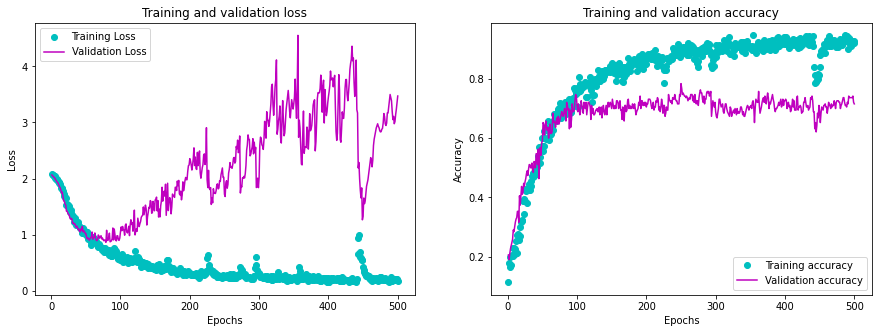

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['acc']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_acc']
epochs=range(1,501)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

Overfitting! and not much accuracy improvement. Reduce epochs:

In [ ]:
input_shape=(40,130)
model = keras.Sequential()
model.add(LSTM(40,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 40)                27360     
                                                                 
 dropout_23 (Dropout)        (None, 40)                0         
                                                                 
 dense_31 (Dense)            (None, 40)                1640      
                                                                 
 dense_32 (Dense)            (None, 20)                820       
                                                                 
 dropout_24 (Dropout)        (None, 20)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                210       
                                                                 
 dropout_25 (Dropout)        (None, 10)               

In [ ]:
import tensorflow as tf

In [ ]:
def scheduler(epoch, lr):
  if epoch < 50:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
8/8 [==============================] - 3s 118ms/step - loss: 2.0796 - acc: 0.1494 - val_loss: 2.0683 - val_acc: 0.1526
Epoch 2/50
8/8 [==============================] - 0s 39ms/step - loss: 2.0578 - acc: 0.1863 - val_loss: 2.0496 - val_acc: 0.1579
Epoch 3/50
8/8 [==============================] - 0s 36ms/step - loss: 2.0369 - acc: 0.1898 - val_loss: 2.0325 - val_acc: 0.1579
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 2.0269 - acc: 0.1793 - val_loss: 2.0188 - val_acc: 0.1579
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 2.0246 - acc: 0.1810 - val_loss: 2.0104 - val_acc: 0.1579
Epoch 6/50
8/8 [==============================] - 0s 36ms/step - loss: 1.9958 - acc: 0.1810 - val_loss: 2.0014 - val_acc: 0.1579
Epoch 7/50
8/8 [==============================] - 0s 36ms/step - loss: 2.0029 - acc: 0.1863 - val_loss: 1.9904 - val_acc: 0.1579
Epoch 8/50
8/8 [==============================] - 0s 34ms/step - loss: 1.9751 - acc: 0.1916 - va

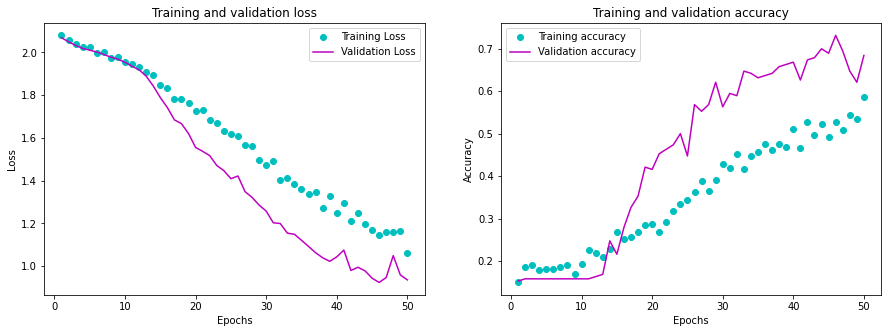

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['acc']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_acc']
epochs=range(1,51)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
history2 = model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
8/8 [==============================] - 0s 44ms/step - loss: 1.1018 - acc: 0.5536 - val_loss: 0.9329 - val_acc: 0.6737
Epoch 2/50
8/8 [==============================] - 0s 37ms/step - loss: 1.0612 - acc: 0.5958 - val_loss: 0.9361 - val_acc: 0.6684
Epoch 3/50
8/8 [==============================] - 0s 37ms/step - loss: 1.0357 - acc: 0.5501 - val_loss: 0.8661 - val_acc: 0.6684
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 1.0830 - acc: 0.5641 - val_loss: 0.8715 - val_acc: 0.7368
Epoch 5/50
8/8 [==============================] - 0s 36ms/step - loss: 1.0100 - acc: 0.5835 - val_loss: 0.8797 - val_acc: 0.7053
Epoch 6/50
8/8 [==============================] - 0s 39ms/step - loss: 0.9991 - acc: 0.6151 - val_loss: 0.8782 - val_acc: 0.6737
Epoch 7/50
8/8 [==============================] - 0s 45ms/step - loss: 0.9871 - acc: 0.5905 - val_loss: 0.8880 - val_acc: 0.7474
Epoch 8/50
8/8 [==============================] - 0s 57ms/step - loss: 1.0689 - acc: 0.5923 - val

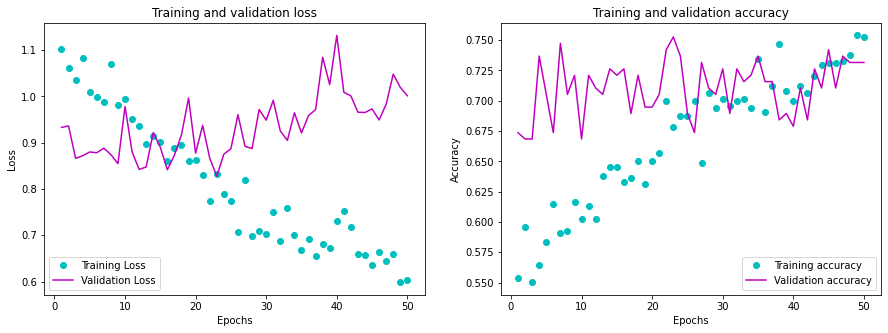

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history2.history
loss_values=history_dict['loss']
acc_values=history_dict['acc']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_acc']
epochs=range(1,51)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
TrainLoss, Trainacc = model.evaluate(X_train,y_train)
TestLoss, Testacc = model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)
print('Confusion_matrix: ',tf.math.confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

8/8 [==============================] - 1s 9ms/step
Confusion_matrix:  tf.Tensor(
[[ 0  0  0  0  0  0  0]
 [ 0 20  0  0  1  2  0]
 [ 0  0 40  5  0  0  1]
 [ 0  0  4 35  0  0  7]
 [ 0  0  3  0 29  4 10]
 [ 0  0  0  0  3 32 11]
 [ 0  0  0  2  5  8 31]], shape=(7, 7), dtype=int32)


In [ ]:
model_name = 'RNN - Emotion_Voice_Detection_Model_RAVDESS_12-17.h5'
save_dir = '/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/RNN - Emotion_Voice_Detection_Model_RAVDESS_12-17.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/RNN - Emotion_Voice_Detection_Model_RAVDESS_12-17.h5')
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 40)                27360     
                                                                 
 dropout_23 (Dropout)        (None, 40)                0         
                                                                 
 dense_31 (Dense)            (None, 40)                1640      
                                                                 
 dense_32 (Dense)            (None, 20)                820       
                                                                 
 dropout_24 (Dropout)        (None, 20)                0         
                                                                 
 dense_33 (Dense)            (None, 10)                210       
                                                                 
 dropout_25 (Dropout)        (None, 10)               

In [ ]:
X_test.shape

(253, 40, 130)

In [ ]:
loss, acc = loaded_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

8/8 [==============================] - 0s 19ms/step - loss: 1.0413 - acc: 0.7391
Restored model, accuracy: 73.91%


#GENERALIZATION?

In [ ]:
happy_raw_audio, sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Happy (Happy).wav')
sad_raw_audio, sad_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Special (Sad).wav')
angry_raw_audio, angry_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Enemy (Angry).wav')
neutral_raw_audio, neutral_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Better Days (Neutral).wav')
lofi_raw_audio, lofi_sr = librosa.load('/content/drive/MyDrive/Junior Year 2022-2023/Adv Topics in DS/Final Project/Test audio/Lofi.wav')

In [ ]:
happy_raw_audio

array([-0.00644011, -0.00257234,  0.01248342, ...,  0.03373526,
       -0.03461011,  0.03977384], dtype=float32)

In [ ]:
sad_raw_audio

array([-0.09484233, -0.14728776, -0.11961937, ..., -0.28962845,
       -0.3065028 ,  0.        ], dtype=float32)

In [ ]:
happy_cut = happy_raw_audio[round(0*sr,ndigits=None):round(3*sr,ndigits=None)]
happy_mfcc = np.array([librosa.feature.mfcc(y=happy_cut, sr=sr, n_mfcc=40)])
happy = np.array((happy_mfcc - np.mean(happy_mfcc))/(np.max(happy_mfcc)-np.min(happy_mfcc)))
happy = happy/np.std(happy)

sad_cut = sad_raw_audio[round(0*sad_sr,ndigits=None):round(3*sad_sr,ndigits=None)]
sad_mfcc = np.array([librosa.feature.mfcc(y=sad_cut, sr=sad_sr, n_mfcc=40)])
sad = np.array((sad_mfcc - np.mean(sad_mfcc))/(np.max(sad_mfcc)-np.min(sad_mfcc)))
sad = sad/np.std(sad)

angry_cut = angry_raw_audio[round(0*angry_sr,ndigits=None):round(3*angry_sr,ndigits=None)]
angry_mfcc = np.array([librosa.feature.mfcc(y=angry_cut, sr=angry_sr, n_mfcc=40)])
angry = np.array((angry_mfcc - np.mean(angry_mfcc))/(np.max(angry_mfcc)-np.min(angry_mfcc)))
angry = angry/np.std(angry)

neutral_cut = neutral_raw_audio[round(0*neutral_sr,ndigits=None):round(3*neutral_sr,ndigits=None)]
neutral_mfcc = np.array([librosa.feature.mfcc(y=neutral_cut, sr=neutral_sr, n_mfcc=40)])
neutral = np.array((neutral_mfcc - np.mean(neutral_mfcc))/(np.max(neutral_mfcc)-np.min(neutral_mfcc)))
neutral = neutral/np.std(neutral)

lofi_cut = lofi_raw_audio[round(0*lofi_sr,ndigits=None):round(3*lofi_sr,ndigits=None)]
lofi_mfcc = np.array([librosa.feature.mfcc(y=lofi_cut, sr=lofi_sr, n_mfcc=40)])
lofi = np.array((lofi_mfcc - np.mean(lofi_mfcc))/(np.max(lofi_mfcc)-np.min(lofi_mfcc)))
lofi = lofi/np.std(lofi)


'\n\n\n\nnp.mean(librosa.feature.mfcc(y=happy_raw_audio, sr = sr,n_mfcc=40).T,axis=0)\nsad_mfcc = np.mean(librosa.feature.mfcc(y=sad_raw_audio, sr = sad_sr,n_mfcc=40).T,axis=0)\nangry_mfcc = np.mean(librosa.feature.mfcc(y=angry_raw_audio, sr=angry_sr,n_mfcc=40).T,axis=0)\nneutral_mfcc = np.mean(librosa.feature.mfcc(y=neutral_raw_audio, sr=neutral_sr,n_mfcc=40).T,axis=0)\nlofi_mfcc = np.mean(librosa.feature.mfcc(y=lofi_raw_audio, sr=lofi_sr,n_mfcc=40).T,axis=0)\n'

In [ ]:
pred_happy = np.argmax(loaded_model.predict(happy))
pred_sad = np.argmax(loaded_model.predict(sad))
pred_angry = np.argmax(loaded_model.predict(angry))
pred_neutral = np.argmax(loaded_model.predict(neutral))
pred_lofi = np.argmax(loaded_model.predict(lofi))

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(pred_happy, pred_sad, pred_angry, pred_neutral, pred_lofi)

2 1 2 2 5


In [ ]:
loaded_model.predict(sad)

1/1 [==============================] - 0s 22ms/step


array([[2.4102778e-06, 6.2829053e-01, 4.6357731e-05, 2.0346430e-05,
        2.6045233e-01, 1.0364948e-01, 7.5184084e-03, 2.0073479e-05]],
      dtype=float32)

In [ ]:
loaded_model.predict(happy)

1/1 [==============================] - 0s 23ms/step


array([[0.00259942, 0.01788986, 0.25543907, 0.04647132, 0.13808411,
        0.31744003, 0.2159504 , 0.00612583]], dtype=float32)

In [ ]:
loaded_model.predict(angry)

1/1 [==============================] - 0s 28ms/step


array([[0.00259942, 0.01788986, 0.25543907, 0.04647132, 0.13808411,
        0.31744003, 0.2159504 , 0.00612583]], dtype=float32)

In [ ]:
loaded_model.predict(neutral)

1/1 [==============================] - 0s 23ms/step


array([[1.3955032e-05, 1.7569391e-05, 7.9397947e-01, 1.9348472e-01,
        1.1323404e-02, 2.6019782e-04, 8.9374318e-04, 2.6938744e-05]],
      dtype=float32)

In [ ]:
loaded_model.predict(lofi)

1/1 [==============================] - 0s 30ms/step


array([[5.5104996e-05, 1.2799607e-01, 1.6057213e-03, 1.3529358e-04,
        1.1308238e-01, 6.8359101e-01, 7.3312066e-02, 2.2231980e-04]],
      dtype=float32)

In [ ]:
g = loaded_model.predict(angry)
print(g)
g = g.argsort()
g

1/1 [==============================] - 0s 31ms/step
[[0.01270175 0.01267173 0.47979692 0.2599134  0.10442109 0.0522968
  0.06345907 0.01473931]]


array([[1, 0, 7, 5, 6, 4, 3, 2]])